In [ ]:
qimport numpy as np #importing all of the packages
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Points for linear regression')

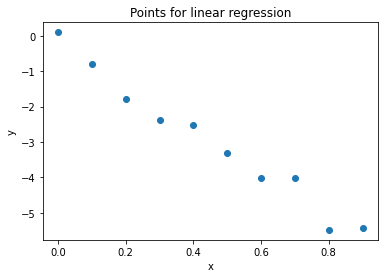

In [ ]:
x = np.load("x_values-1.npy") #loading the files
y = np.load("y_values-1.npy")

plt.scatter(x,y) #plotting the graph
plt.xlabel("x")
plt.ylabel("y")
plt.title('Points for linear regression') 

In [ ]:
model = LinearRegression()                                                 #making the model
x_train, x_test, y_train, y_test = train_test_split(x,y,  train_size=0.3 ) #initiating training and testing models 
model.fit(x_train, y_train)                                                #Foitting the model

LinearRegression()

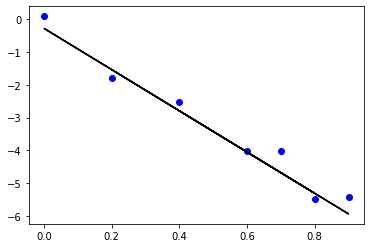

In [ ]:
y_pred = model.predict(x_test)              #model preidction
plt.scatter(x_test, y_test, color ='b')     #general plotting
plt.plot(x_test, y_pred, color ='k')
plt.show()

In [ ]:
X= np.array([0.48]).reshape(1,-1)       #making 0.48 into a 1-D array
Y=model.predict(X)                      #preidcting the model
print(Y)

[[-3.29736689]]


# Task 3.2
Visualization of Data


Text(0.5, 1.0, 'Visualization of the data')

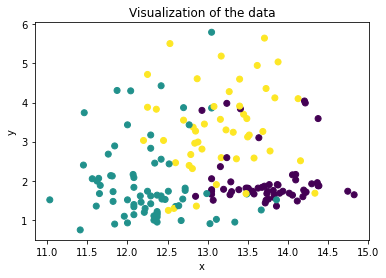

In [ ]:
w = np.load("wineData-1.npy")         #loading the data
wl = np.load("wineLabels-1.npy")

plt.scatter(w[:,0], w[:,1], c=wl)     #plotting and scattering the data
plt.xlabel("x")
plt.ylabel("y")
plt.title('Visualization of the data') 

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(w,wl, train_size=0.8, test_size=0.2, random_state=123)    #initialzin for wine datasets

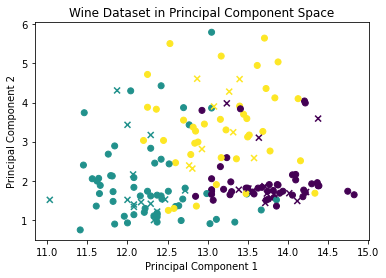

In [ ]:
plt.scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_labels) #plotting the labels
plt.scatter(test_data[:,0],test_data[:,1], marker='x', c=test_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wine Dataset in Principal Component Space')
plt.show()

In [ ]:
pca = PCA(n_components=2)                 #making a PCA model while limiting the features
X1_train = pca.fit_transform(train_data)
X1_test = pca.transform(test_data)

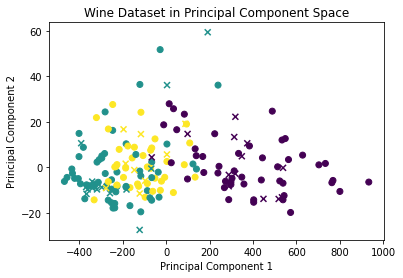

In [ ]:
plt.scatter(X1_train[:, 0], X1_train[:, 1], marker='o', c=train_labels) #plottingthe labels
plt.scatter(X1_test[:,0],X1_test[:,1], marker='x', c=test_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wine Dataset in Principal Component Space')
plt.show()

# Task 3.3
Linear Discriminant Space

In [ ]:
LDA= LinearDiscriminantAnalysis()     #making the model
LDA.fit(train_data,train_labels)      #Fitting the data

LinearDiscriminantAnalysis()

In [ ]:
X2_train = LDA.fit_transform(train_data, train_labels )   #LDA fit for the data
X2_test = LDA.transform(test_data)                        #LDA transform for the data

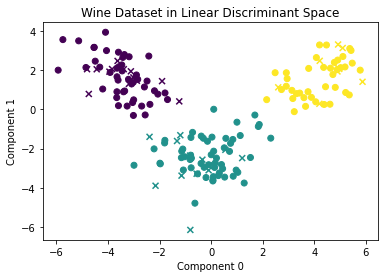

In [ ]:
plt.scatter(X2_train[:, 0], X2_train[:, 1], marker='o', c=train_labels)   #plotting the data
plt.scatter(X2_test[:,0],X2_test[:,1], marker='x', c=test_labels)
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.title('Wine Dataset in Linear Discriminant Space')
plt.show()

# Task 3.4

In [ ]:
train_x = train_data.copy()    
Mean = np.mean(train_x, axis =0) 
Mean_centered =train_x-Mean
U,S,VT = np.linalg.svd(Mean_centered)
VT = VT[:2,:]
V= np.transpose(VT)
Training_projected= np.matmul(Mean_centered,V)
X_train_projected= Training_projected[:,:2]
Mean_testing_data= test_data-train_data.mean()
Testing_projected = np.matmul(Mean_testing_data,V)
X_test_projected = Testing_projected[:,:2]
print(X_train_projected.shape)

(142, 2)


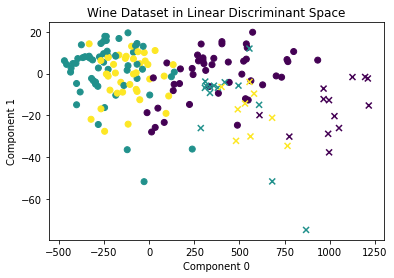

In [ ]:
plt.scatter(X_train_projected[:, 0], X_train_projected[:, 1], marker='o', c=train_labels)   #plotting the graph
plt.scatter(X_test_projected[:,0],X_test_projected[:,1], marker='x', c=test_labels)
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.show()

# Task 3.5

(60000, 87)


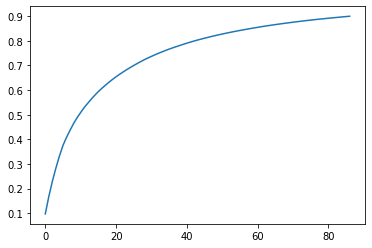

In [ ]:
task5_data = np.load("task3_5_data.npy")         #loading the data
task5_label =np.load("task3_5_labels.npy")
Pca2 = PCA(0.9)      
Pca2.fit(task5_data)
Trans= Pca2.transform(task5_data)
print(Trans.shape)
plt.plot(np.cumsum(Pca2.explained_variance_ratio_)) #Cummulative sum of variance
plt.show()